# Comparison of Results from Differential Gene Expression Analysis 

#### Paper = results obtained from supplementary table 3 from paper ['RNA-Seq of whole genome...'](https://www.nature.com/articles/s43587-021-00088-6)
#### DESeq = results obtained using DESeq2 library in R in attempt to replicate results from above
#### Limma = results when replicating analysis directly using code from paper above

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
deseq_df = pd.read_csv('../output/case_control_deseq.csv').drop(['delabel'] , axis = 1)
deseq_df = deseq_df.rename(columns={'Unnamed: 0' : 'gene_id'})
paper_df = pd.read_csv('../Data/case_control.csv' , skiprows=1)
limma_df = pd.read_csv('../output/case_control_limma.csv')
limma_df = limma_df.drop(['Unnamed: 0']  ,axis = 1)

In [3]:
paper_diff_df = paper_df[np.logical_or(np.logical_and((paper_df['logFC'] > 0.1),(paper_df['adj.P.Val'] < 0.05)),np.logical_and((paper_df['logFC'] < -0.1),(paper_df['adj.P.Val'] < 0.05)))]
limma_diff_df = limma_df[np.logical_or(np.logical_and((limma_df['logFC'] > 0.1),(limma_df['adj.P.Val'] < 0.05)),np.logical_and((limma_df['logFC'] < -0.1),(limma_df['adj.P.Val'] < 0.05)))]
deseq_diff_df =  deseq_df[np.logical_or(np.logical_and((deseq_df['log2FoldChange'] > 0.1),(deseq_df['padj'] < 0.05)),np.logical_and((deseq_df['log2FoldChange'] < -0.1),(deseq_df['padj'] < 0.05)))]

In [4]:
gene_overlap_deseq_paper = len(set(deseq_diff_df['gene_id']) & set(paper_diff_df['gene_id']))/max(len(deseq_diff_df['gene_id']),len(paper_diff_df['gene_id']))*100
gene_overlap_limma_paper = len(set(limma_diff_df['gene_id']) & set(paper_diff_df['gene_id']))/max(len(limma_diff_df['gene_id']),len(paper_diff_df['gene_id']))*100
gene_overlap_deseq_limma = len(set(deseq_diff_df['gene_id']) & set(limma_diff_df['gene_id']))/max(len(deseq_diff_df['gene_id']),len(limma_diff_df['gene_id']))*100

print('| \t Percentage Overlap in Differentially Expressed genes between  \t |')
print('--------------------------------------------------------------------------')
print('|    deseq & paper \t |    limma & paper \t |     deseq & limma \t | ')
print('--------------------------------------------------------------------------')
print('|\t %2.2f%%  \t | \t %2.2f%% \t | \t %2.2f%%  \t | ' % (gene_overlap_deseq_paper, gene_overlap_limma_paper ,gene_overlap_deseq_limma))

| 	 Percentage Overlap in Differentially Expressed genes between  	 |
--------------------------------------------------------------------------
|    deseq & paper 	 |    limma & paper 	 |     deseq & limma 	 | 
--------------------------------------------------------------------------
|	 66.86%  	 | 	 70.99% 	 | 	 66.51%  	 | 


## Similarity Comparison of Results

### Sorted by Log Fold Change

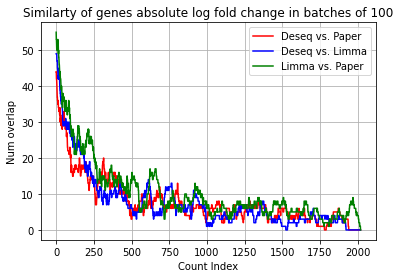

In [5]:
ordered_paper_gene = paper_diff_df.reindex(paper_diff_df['logFC'].abs().sort_values(ascending=False).index)
ordered_limma_gene = limma_diff_df.reindex(limma_diff_df['logFC'].abs().sort_values(ascending=False).index)
ordered_deseq_gene = deseq_diff_df.reindex(deseq_diff_df['log2FoldChange'].abs().sort_values(ascending=False).index)

count_deseq_limma = []
count_limma_paper = []
count_deseq_paper =[]

batch = 100
for i in range(1 , len(ordered_limma_gene)-batch) : 
    count_limma_paper.append(len(set(ordered_limma_gene['gene_id'][i:i+batch]) & set(ordered_paper_gene['gene_id'][i:i+batch])))
    count_deseq_limma.append(len(set(ordered_limma_gene['gene_id'][i:i+batch]) & set(ordered_deseq_gene['gene_id'][i:i+batch])))
    count_deseq_paper.append(len(set(ordered_paper_gene['gene_id'][i:i+batch]) & set(ordered_deseq_gene['gene_id'][i:i+batch])))
 
plt.plot(count_deseq_paper , 'r' , label = 'Deseq vs. Paper')
plt.plot(count_deseq_limma , 'b' , label = 'Deseq vs. Limma')
plt.plot(count_limma_paper , 'g' , label = 'Limma vs. Paper')
plt.title('Similarty of genes absolute log fold change in batches of %i' % (batch))
plt.ylabel('Num overlap')
plt.xlabel('Count Index')
plt.legend()
plt.grid()
plt.savefig('./../Plots/similariy_logfc.png')

### Sorted by adjusted p-value

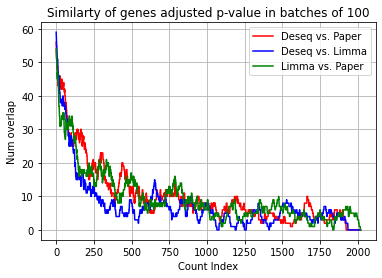

In [6]:
ordered_paper_gene = paper_diff_df.reindex(paper_diff_df['adj.P.Val'].sort_values(ascending=True).index)
ordered_limma_gene = limma_diff_df.reindex(limma_diff_df['adj.P.Val'].sort_values(ascending=True).index)
ordered_deseq_gene = deseq_diff_df.reindex(deseq_diff_df['padj'].sort_values(ascending=True).index)

count_deseq_limma = []
count_limma_paper = []
count_deseq_paper =[]

batch = 100
for i in range(1 , len(ordered_limma_gene)-batch) : 
    count_limma_paper.append(len(set(ordered_limma_gene['gene_id'][i:i+batch]) & set(ordered_paper_gene['gene_id'][i:i+batch])))
    count_deseq_limma.append(len(set(ordered_limma_gene['gene_id'][i:i+batch]) & set(ordered_deseq_gene['gene_id'][i:i+batch])))
    count_deseq_paper.append(len(set(ordered_paper_gene['gene_id'][i:i+batch]) & set(ordered_deseq_gene['gene_id'][i:i+batch])))
 
plt.plot(count_deseq_paper , 'r' , label = 'Deseq vs. Paper')
plt.plot(count_deseq_limma , 'b' , label = 'Deseq vs. Limma')
plt.plot(count_limma_paper , 'g' , label = 'Limma vs. Paper')
plt.title('Similarty of genes adjusted p-value in batches of %i' % (batch))
plt.ylabel('Num overlap')
plt.xlabel('Count Index')
plt.legend()
plt.grid()
plt.savefig('./../Plots/similariy_pvalue.png')

## Further Analysis of DESeq vs. Paper

In [7]:
merge_df = pd.merge(deseq_df , paper_df, on='gene_id')

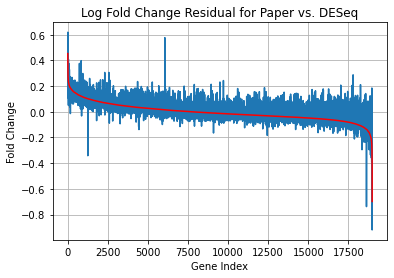

In [8]:
merge_df_sorted = merge_df.reindex(merge_df.logFC.sort_values(ascending=False).index).reset_index()
plt.plot(merge_df_sorted['log2FoldChange'] )
plt.plot(merge_df_sorted['logFC'] , 'r')
plt.ylabel('Fold Change')
plt.xlabel('Gene Index')
plt.title('Log Fold Change Residual for Paper vs. DESeq')
plt.grid()
plt.savefig('./../Plots/dp_lfcres.png')

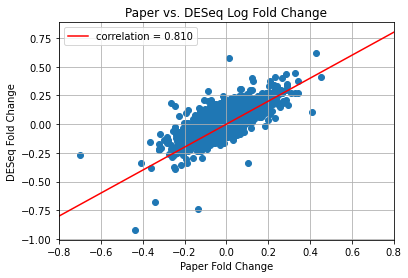

In [9]:
plt.scatter(merge_df['logFC'] , merge_df['log2FoldChange'] )
x = np.linspace(-0.8,0.8,100)
y = x
plt.plot(x,y , 'r' , label = 'correlation = %1.3f' % np.corrcoef(merge_df['logFC'] , merge_df['log2FoldChange'])[0][1])
plt.legend()
plt.xlim([-0.8 , 0.8])
plt.xlabel('Paper Fold Change')
plt.ylabel('DESeq Fold Change')
plt.title('Paper vs. DESeq Log Fold Change')
plt.grid()
plt.savefig('./../Plots/dp_lfc.png')

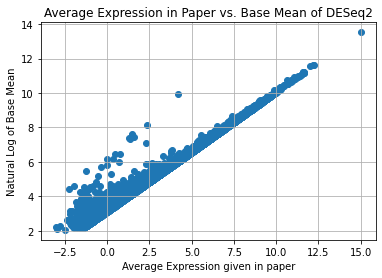

In [10]:
plt.scatter(merge_df['AveExpr'] , np.log(merge_df['baseMean']))
plt.title('Average Expression in Paper vs. Base Mean of DESeq2')
plt.ylabel('Natural Log of Base Mean')
plt.xlabel('Average Expression given in paper')
plt.grid()
plt.savefig('./../Plots/dp_aveexpr.png')

## Further Analysis of DESeq vs. Limma

In [11]:
merge_df = pd.merge(deseq_df , limma_df, on='gene_id')

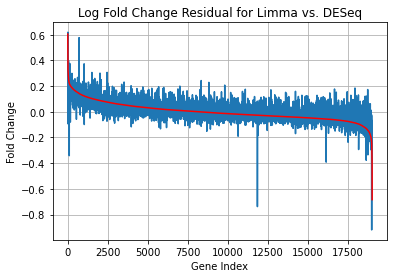

In [12]:
merge_df_sorted = merge_df.reindex(merge_df.logFC.sort_values(ascending=False).index).reset_index()
plt.plot(merge_df_sorted['log2FoldChange'] )
plt.plot(merge_df_sorted['logFC'] , 'r')
plt.ylabel('Fold Change')
plt.xlabel('Gene Index')
plt.title('Log Fold Change Residual for Limma vs. DESeq')
plt.grid()
plt.savefig('./../Plots/dl_lfcres.png')

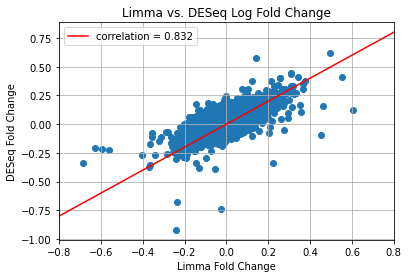

In [13]:
plt.scatter(merge_df['logFC'] , merge_df['log2FoldChange'] )
x = np.linspace(-0.8,0.8,100)
y = x
plt.plot(x,y , 'r' , label = 'correlation = %1.3f' % np.corrcoef(merge_df['logFC'] , merge_df['log2FoldChange'])[0][1])
plt.legend()
plt.xlim([-0.8 , 0.8])
plt.xlabel('Limma Fold Change')
plt.ylabel('DESeq Fold Change')
plt.title('Limma vs. DESeq Log Fold Change')
plt.grid()
plt.savefig('./../Plots/dl_lfc.png')

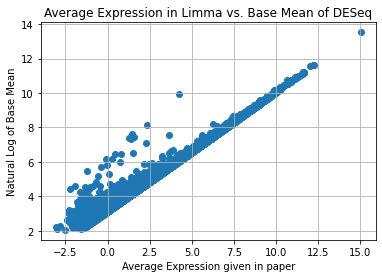

In [14]:
plt.scatter(merge_df['AveExpr'] , np.log(merge_df['baseMean']))
plt.title('Average Expression in Limma vs. Base Mean of DESeq')
plt.ylabel('Natural Log of Base Mean')
plt.xlabel('Average Expression given in paper')
plt.grid()
plt.savefig('./../Plots/dl_aveexpr.png')

## Further Analysis of Limma vs. Paper

In [15]:
merge_df = pd.merge(paper_df , limma_df, on='gene_id')

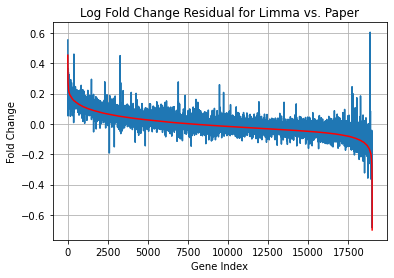

In [16]:
merge_df_sorted = merge_df.reindex(merge_df.logFC_x.sort_values(ascending=False).index).reset_index()
plt.plot(merge_df_sorted['logFC_y'] )
plt.plot(merge_df_sorted['logFC_x'] , 'r')
plt.ylabel('Fold Change')
plt.xlabel('Gene Index')
plt.title('Log Fold Change Residual for Limma vs. Paper')
plt.grid()
plt.savefig('./../Plots/lp_lfcexpr.png')

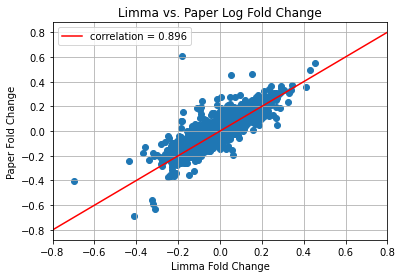

In [17]:
plt.scatter(merge_df['logFC_x'] , merge_df['logFC_y'] )
x = np.linspace(-0.8,0.8,100)
y = x
plt.plot(x,y , 'r' , label = 'correlation = %1.3f' % np.corrcoef(merge_df['logFC_x'] , merge_df['logFC_y'])[0][1])
plt.legend()
plt.xlim([-0.8 , 0.8])
plt.xlabel('Limma Fold Change')
plt.ylabel('Paper Fold Change')
plt.title('Limma vs. Paper Log Fold Change')
plt.grid()
plt.savefig('./../Plots/lp_lfc.png')

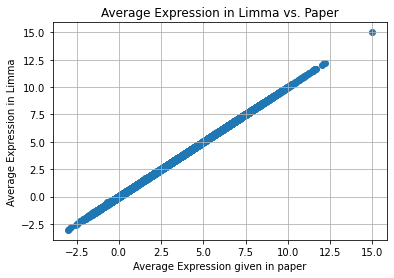

In [18]:
plt.scatter(merge_df['AveExpr_x'] , merge_df['AveExpr_y'])
plt.title('Average Expression in Limma vs. Paper')
plt.ylabel('Average Expression in Limma')
plt.xlabel('Average Expression given in paper')
plt.grid()
plt.savefig('./../Plots/lp_aveexpr.png')